In [2]:
from root_pandas import read_root
import pdg
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/00


In [3]:
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Input, Add

Using TensorFlow backend.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [6]:
data = read_root('../mc/exp55_run50_train.root', 'lambda')

In [7]:
data.columns

Index(['__experiment__', '__run__', '__event__', '__candidate__',
       '__ncandidates__', '__weight__', 'M', 'p', 'chiProb', 'cosa', 'cosaXY',
       'dr', 'dz', 'distance', 'significanceOfDistance', 'min_dr',
       'goodBelleLambda', 'isSignal', 'genMotherPDG', 'IPX', 'IPY', 'IPZ',
       'p_pid_ppi', 'p_pid_pk', 'p_pid_kpi', 'p_dr', 'p_dz', 'p_p',
       'p_isSignal', 'p_genMotherPDG', 'pi_pid_ppi', 'pi_pid_pk', 'pi_pid_kpi',
       'pi_dr', 'pi_dz', 'pi_p', 'pi_isSignal', 'pi_genMotherPDG'],
      dtype='object')

In [8]:
data.head()

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,p,chiProb,cosa,...,p_isSignal,p_genMotherPDG,pi_pid_ppi,pi_pid_pk,pi_pid_kpi,pi_dr,pi_dz,pi_p,pi_isSignal,pi_genMotherPDG
0,55,7,8,0,1,1.0,1.165105,0.490118,0.000000e+00,-0.947015,...,0.0,113.0,0.001,0.001000,0.001,18.428707,86.226101,0.215878,1.0,-321.0
1,55,7,17,0,1,1.0,1.127725,0.394250,0.000000e+00,0.846915,...,0.0,421.0,0.001,0.001000,0.001,30.917240,16.672331,0.153996,0.0,-211.0
2,55,7,16,0,1,1.0,1.117808,0.847351,0.000000e+00,-0.993323,...,0.0,-411.0,0.001,0.001000,0.001,27.059559,33.095623,0.186119,0.0,113.0
3,55,7,25,0,1,1.0,1.117568,0.864626,2.421974e-01,0.995793,...,1.0,-3122.0,0.001,0.018339,0.001,0.605767,1.253609,0.079810,1.0,-3122.0
4,55,7,44,0,2,1.0,1.110521,1.165721,1.490779e-18,-0.017120,...,0.0,310.0,0.001,0.001000,0.001,1.732089,-0.183578,0.265781,0.0,211.0


In [9]:
train, test, _, _ = train_test_split(data, data.isSignal, test_size = 0.5, stratify = data.isSignal)

In [10]:
features = ['chiProb', 'cosaXY', 'dr', 'dz', 'min_dr', 'distance',
            'p_pid_pk', 'p_pid_ppi', 
            'pi_pid_kpi', 'pi_pid_ppi',
            'p_p', 'pi_p']

In [11]:
model = Sequential()
model.add(Dense(16, input_shape = (len(features), ),activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

W0212 02:17:31.769278 140568413423360 deprecation_wrapper.py:119] From /cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0212 02:17:31.866835 140568413423360 deprecation_wrapper.py:119] From /cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0212 02:17:31.875398 140568413423360 deprecation_wrapper.py:119] From /cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

W0212 02:17:34.990282 140568413423360 deprecation_wrapper.py:119] From /cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0212 02:17:35.023096 140568413423360 deprecation_wrapper.py:119] From /cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0212 02:17:35.031370 140568413423360 deprecation.py:323] From /cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
model.fit(train[features], train.isSignal,
          batch_size = 256, epochs = 10,
          validation_data = (test[features], test.isSignal))

Train on 218708 samples, validate on 218709 samples
Epoch 1/10
218708/218708 [==============================] - 9s 42us/step - loss: 0.0942 - acc: 0.9703 - val_loss: 0.1002 - val_acc: 0.9683
Epoch 2/10
218708/218708 [==============================] - 9s 43us/step - loss: 0.0934 - acc: 0.9704 - val_loss: 0.0899 - val_acc: 0.9716
Epoch 3/10
218708/218708 [==============================] - 8s 38us/step - loss: 0.0923 - acc: 0.9703 - val_loss: 0.0898 - val_acc: 0.9715
Epoch 4/10
218708/218708 [==============================] - 8s 39us/step - loss: 0.0917 - acc: 0.9704 - val_loss: 0.1042 - val_acc: 0.9670
Epoch 5/10
218708/218708 [==============================] - 9s 42us/step - loss: 0.0912 - acc: 0.9707 - val_loss: 0.0917 - val_acc: 0.9710
Epoch 6/10
218708/218708 [==============================] - 11s 50us/step - loss: 0.0908 - acc: 0.9709 - val_loss: 0.0887 - val_acc: 0.9718
Epoch 7/10
218708/218708 [==============================] - 8s 36us/step - loss: 0.0903 - acc: 0.9710 - val_loss:

In [71]:
def build_res_model(input_shape):
    X_input = Input(input_shape)
    X = X_input
    X = Dense(16, input_shape = input_shape,activation = 'relu')(X)
    X = Dense(8, activation = 'relu')(X)
    X = Add()([X, X_input])
    X = Dense(1, activation = 'sigmoid')(X)
    model = Model(inputs = X_input, outputs = X)
    return model

In [72]:
res_model = build_res_model((8,))

In [73]:
res_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 8)            0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 16)           144         input_5[0][0]                    
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 8)            136         dense_21[0][0]                   
__________________________________________________________________________________________________
add_5 (Add)                     (None, 8)            0           dense_22[0][0]                   
                                                                 input_5[0][0]                    
__________

In [74]:
res_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [75]:
res_model.fit(train[features], train.isSignal,
          batch_size = 256, epochs = 50,
          validation_data = (test[features], test.isSignal))

ValueError: Error when checking input: expected input_5 to have shape (8,) but got array with shape (12,)

In [15]:
test.loc[:, 'mva'] = model.predict(test[features])
train.loc[:, 'mva'] = model.predict(train[features])

/cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [85]:
train.head()

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,p,chiProb,cosa,...,p_genMotherPDG,pi_pid_ppi,pi_pid_pk,pi_pid_kpi,pi_dr,pi_dz,pi_p,pi_isSignal,pi_genMotherPDG,mva
412260,55,43,385513,0,1,1.0,1.115697,1.003169,6.621859e-02,0.999999,...,3122.0,0.001000,0.001000,0.001000,13.355302,-10.505295,0.271095,1.0,3122.0,9.411598e-01
101536,55,34,77082,0,1,1.0,1.135745,0.818394,5.899046e-20,-0.936027,...,313.0,0.999000,0.244904,0.999000,0.045587,-12.263409,0.271158,0.0,421.0,1.192093e-07
251792,55,7,16760,0,1,1.0,1.114345,0.516217,4.759075e-02,0.657816,...,3122.0,0.001000,0.001000,0.001000,6.034201,-18.329960,0.176106,1.0,3122.0,8.289982e-01
79470,55,28,172067,0,1,1.0,1.111055,0.455249,6.597530e-01,0.006766,...,-213.0,0.001000,0.001000,0.001000,0.146989,1.622901,0.141978,0.0,22.0,9.268522e-06
111991,55,38,71156,0,1,1.0,1.115947,2.356331,9.969030e-01,0.999996,...,-3122.0,0.000001,0.001000,0.000001,18.029173,7.276191,0.437101,1.0,-3122.0,9.999771e-01


In [86]:
test.head()

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,p,chiProb,cosa,...,p_genMotherPDG,pi_pid_ppi,pi_pid_pk,pi_pid_kpi,pi_dr,pi_dz,pi_p,pi_isSignal,pi_genMotherPDG,mva
200359,55,34,1592,0,1,1.0,1.130265,0.476733,2.399015e-11,-0.782248,...,310.0,0.001000,0.001000,0.001000,6.716284,-1.390638,0.168665,1.0,323.0,0.000560
333348,55,38,97382,0,1,1.0,1.114885,3.772121,5.238237e-02,0.993614,...,-3122.0,0.000001,0.001000,0.000001,1.569017,0.220221,0.503980,1.0,-3122.0,0.994982
163132,55,43,274666,0,1,1.0,1.114997,1.030730,9.772386e-01,0.999302,...,-3122.0,0.001000,0.001000,0.001000,1.097223,-0.934916,0.245296,1.0,-3122.0,0.997010
359600,55,40,336216,0,1,1.0,1.107871,1.677325,1.575073e-34,0.494439,...,10022.0,0.001003,0.001000,0.001003,0.153916,0.920977,0.332940,1.0,2214.0,0.393559
163862,55,43,285006,0,1,1.0,2.699260,5.628109,0.000000e+00,-0.682707,...,-211.0,0.001000,0.029354,0.001000,2.838017,69.656309,0.130450,0.0,22.0,0.011410


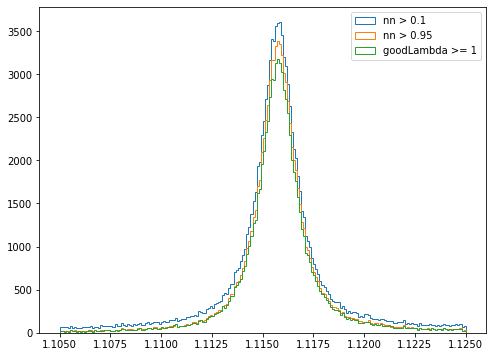

In [28]:
plt.figure(figsize = (8, 6))
# plt.hist(test.M, range = [1.105, 1.125], bins = 200, histtype = 'step', label = 'all')
plt.hist(test[test.mva > 0.1].M, range = [1.105, 1.125], bins = 200, histtype = 'step', label = 'nn > 0.1')
plt.hist(test[test.mva > 0.95].M, range = [1.105, 1.125], bins = 200, histtype = 'step', label = 'nn > 0.95')
plt.hist(test[(test.goodBelleLambda >= 1) & (test.p_pid_ppi > 0.6)].M, range = [1.105, 1.125], bins = 200, histtype = 'step', label = 'goodLambda >= 1')

plt.legend()
plt.show()

In [88]:
roc_auc_score(test.isSignal, test.mva), roc_auc_score(train.isSignal, train.mva)

(0.9940132758323856, 0.993760215074539)

AUC for `16-8-1`: 
(0.993946454601182, 0.9937648984095526)

AUC for `16-8-8-1`
(0.9940132758323856, 0.993760215074539)
